# Feature Engine - Unit 02 - Handle Missing Data

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Learn how to handle Missing Data on numerical and categorical data



---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

And load our typical packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Handle Missing Data

Feature-engine imputes missing data with values learned from the data or arbitrary values set by the user, either from numerical or categorical variables. We will study:
* Mean Median Imputer
* Arbitrary Number Imputer
* Categorical Imputer
* Drop Missing Data

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Mean Median Imputer

It replaces missing data with the mean or median value of the variable. It works only with numerical variables. The documentation link is [here](https://feature-engine.readthedocs.io/en/1.1.x/imputation/MeanMedianImputer.html)


* Parse a list of variables to be imputed. Alternatively, this imputer can automatically select all variables of type numeric.
* The imputer first calculates the mean/median values of the variables (with the fit method). Then replaces the missing data with the estimated value (with the transform method).

from feature_engine.imputation import MeanMedianImputer

How do you know if you should impute the mean or the median?
* You should assess the numerical distribution plot. If it is normally distributed (bell curve shape), you can replace missing values as the mean. Otherwise, replace with the median

Let's load the penguins dataset

url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
df = df.sample(frac=0.5, random_state=5)
df.head()

Let's check missing data levels with `.isnull().sum()`

df.isnull().sum()

We assess the distribution. We will replace the values with the median.

sns.set_style('whitegrid')
for col in ['bill_length_mm' , 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
  sns.histplot(data=df, x=col, kde=True)
  plt.show()
  print('\n')

We load and set the transformer. The arguments are:
* imputation_method: either mean or median
* variables: list of numerical variables to apply the method to. If you dont parse anything here, the transformer will consider all numerical variables

from feature_engine.imputation import MeanMedianImputer
imputer = MeanMedianImputer(imputation_method='median',
                            variables=['bill_length_mm' , 'bill_depth_mm',
                                       'flipper_length_mm', 'body_mass_g'])

We use the `.fit()` method, so the transformer can learn the median values from the selected variables. The argument is the dataset you are interested to learn from

imputer.fit(df)

As a learning step, let's check the learned values with the attribute `.imputer_dict_`

imputer.imputer_dict_

we now transform the data, which means we replace the missing data of each variable according to its respective learned median value. We use `.transform()` method. The argument is the dataset you want to transform

df = imputer.transform(df)

Check the output, it is a DataFrame.
* At first, we may think this is a minor detail; however other libraries for feature engineer, like scikit-learn, return as an array a ``.transform()`` command when doing a data transformation

print(type(df))
df.head()

Let's check missing levels on `['bill_length_mm' , 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']`. They were replaced with median values

df.isnull().sum()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Let's use an example where we arrange a transformer in a pipeline. We will use this approach from now on. 
* First we reload the dataset with missing data


url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
df = df.sample(frac=0.5, random_state=5)
df.isnull().sum()

We set the pipeline in 1 step. We name it as 'median'. Then we use the `MeanMedianImputer()` and the arguments we saw earlier

pipeline = Pipeline([
      ( 'median',  MeanMedianImputer(imputation_method='median',
                                     variables=['bill_length_mm' , 'bill_depth_mm',
                                                'flipper_length_mm', 'body_mass_g']) )
])
pipeline

We fit the pipeline. That means we will execute all the tasks in the pipeline
* In this example, it has 1 step which learns the median value from the selected variables

pipeline.fit(df)

We then transform the dataset

df = pipeline.transform(df)

And check for missing data

df.isnull().sum()

If we want to check the learned values from the median imputed, we have to assess the step. Using bracket notation, we write the step name

pipeline['median']

We then use the respective attribute from the transformer, in this case, `.imputer_dict_`

pipeline['median'].imputer_dict_

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Arbitrary Number

It replaces missing data in numerical variables with an arbitrary number determined by the user. The function documentation is [here](https://feature-engine.readthedocs.io/en/1.1.x/imputation/ArbitraryNumberImputer.html)
* The arguments are the variables and the number to be imputed


from feature_engine.imputation import ArbitraryNumberImputer

Let's use the penguins dataset and check missing data levels

url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
df = df.sample(frac=0.5, random_state=5)
df.isnull().sum()

We set the pipeline. Imagine you conducted the same data analysis as before and decided (with no criteria) you want to impute`-100` where `bill_length_mm`, and `-500` for the remaining numerical variables with missing data.
* The values we chose here are arbitrary. In a project, this imputation can be related to a particular business context, for example, imagine if the variable is Age and you have the long term experience that if a row is missing for this variable, you should replace it with, say, 25.

pipeline = Pipeline([
      ( 'bill_length_mm',  ArbitraryNumberImputer(arbitrary_number=-100,
                                                  variables=['bill_length_mm']) ),

      ( 'other_variables',  ArbitraryNumberImputer(arbitrary_number=-500,
                                                   variables=['bill_depth_mm',
                                                              'flipper_length_mm',
                                                              'body_mass_g']) )

])
pipeline

We fit the pipeline with the df

pipeline.fit(df)

We then transform the dataset

df = pipeline.transform(df)

And check for missing data

df.isnull().sum()

If we want to check the learned values from the arbitrary imputation, we have to assess the step. Using bracket notation, we write the step name. We first check `bill_length_mm`

pipeline['bill_length_mm'].imputer_dict_

Then for the remaining variables

pipeline['other_variables'].imputer_dict_

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Categorical Imputer

It replaces missing data in categorical variables by an arbitrary value (typically with the label 'missing') or by the most frequent category. The documentation is found [here](https://feature-engine.readthedocs.io/en/1.1.x/imputation/CategoricalImputer.html)
* How do we select between the most frequent category or arbitrary value imputation?
  * It will depend on your business context and the missing levels. If you believe there is a hidden pattern that your data is missing, in this categorical variable, you can replace it with 'missing' and may expect an algorithm will find and use that for predictions.
  * Or maybe if the missing levels are so low, you can, in theory, replace them with the most frequent level without jeopardizing the analysis


from feature_engine.imputation import CategoricalImputer

##### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Replace with 'Missing'

Let's use the penguins dataset and check missing data levels

url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
df = df.sample(n=50, random_state=1)
df.isnull().sum()

Let's assess `sex` frequency with .value_counts()

df['sex'].value_counts()

We will first replace it with a 'missing' label. We set the transformer in a pipeline by defining its name and CategoricalImputer as the function. The parameters are the imputation method, the value to be filled and the variables

pipeline = Pipeline([
      ( 'categorical_imputer', CategoricalImputer(imputation_method='missing',
                                                  fill_value='Missing',
                                                  variables=['sex']) )
])
pipeline

For learning purposes, we can use `.fit_transform()`, so we can speed up the process of fitting and transforming the data. We assign the result to df

df = pipeline.fit_transform(df)

We check again `sex` distribution with `.value_counts()`. Now ``missing`` is a label in this variable.


df['sex'].value_counts()

##### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Replace with most frequent

We will reload the penguins dataset and use the other method: impute with the most frequent

url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

We set the pipeline and `.fit_transform()`
* CategoricalImputer now has imputation method as frequent.

df['sex'].value_counts()

pipeline = Pipeline([
      ( 'categorical_imputer', CategoricalImputer(imputation_method='frequent',
                                                  variables=['sex']) )
])


df = pipeline.fit_transform(df)

We check again `sex` distribution with `.value_counts()`.
* You may remember, at first, Male had 168 rows. Now it has increased after this transformation


df['sex'].value_counts()

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Drop Missing Data

It deletes rows with missing values, similar to `pd.drop_na()`. It can handle numerical and categorical variables.
* the arguments are the list of variables for which missing values should be removed. When you don't set the variables list explicitly, the transformer will drop all missing data rows. The documentation link is [here](https://feature-engine.readthedocs.io/en/1.1.x/imputation/DropMissingData.html).
* In theory, you should consider as a last resort the option to drop missing data since there was an effort and cost to collect the data. However, if you see the imputing methods will not serve you, and your missing data levels are low, you, in theory, can remove the missing data without jeopardizing the analysis

from feature_engine.imputation import DropMissingData

As usual, let's consider the penguins dataset and check missing data levels. We notice the dataset has 344 rows. The missing data level looks not to be significant. The majority of missing levels is 2, and there is 1 with 11

url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
print(f"{df.shape} \n")
df.isnull().sum()

We set the pipeline with this transformer - we don't parse any variables since we are interested to drop all missing data. Then we `.fit_transform()` the data

pipeline = Pipeline([
      ( 'drop_na', DropMissingData() )
])


df = pipeline.fit_transform(df)

We check again how many rows the data has and the missing levels.
* We notice now the data has 333 rows, before was 344 rows

print(f"{df.shape} \n")
df.isnull().sum()



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer

In [2]:
# Reload the penguins dataset
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
df = df.sample(frac=0.5, random_state=5)

# Checking missing data levels
print(df.isnull().sum())

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  7
dtype: int64


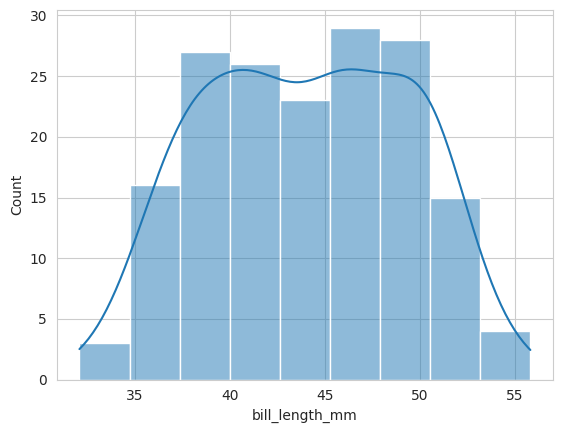

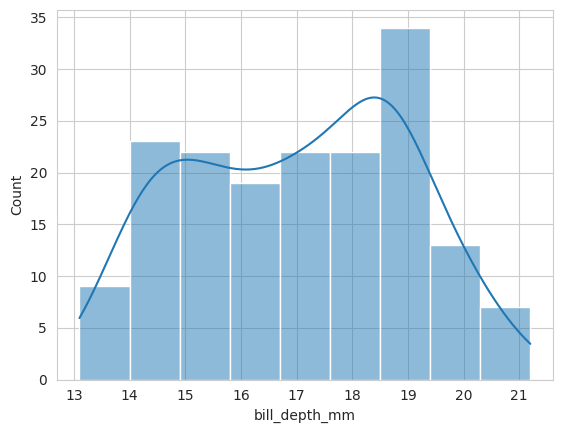

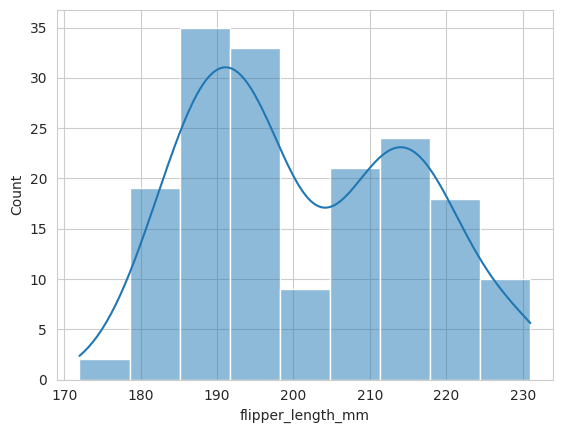

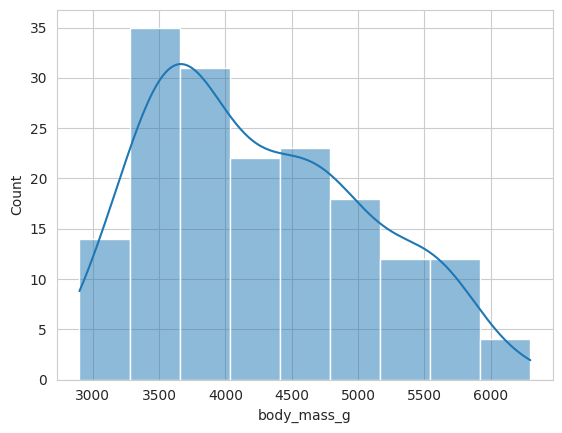

In [3]:
# Assessing the distribution for numerical variables
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    sns.histplot(data=df, x=col, kde=True)
    plt.show()
    print('\n')

In [3]:
from feature_engine.imputation import MeanMedianImputer
imputer = MeanMedianImputer(imputation_method='median',
                            variables=['bill_length_mm' , 'bill_depth_mm',
                                       'flipper_length_mm', 'body_mass_g'])

In [4]:
imputer.fit(df)

MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                             'flipper_length_mm', 'body_mass_g'])

In [5]:
imputer.imputer_dict_

{'bill_length_mm': 44.5,
 'bill_depth_mm': 17.1,
 'flipper_length_mm': 198.0,
 'body_mass_g': 4100.0}

In [6]:
df = imputer.transform(df)

In [7]:
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
320,Gentoo,Biscoe,48.5,15.0,219.0,4850.0,FEMALE
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,FEMALE
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,MALE
42,Adelie,Dream,36.0,18.5,186.0,3100.0,FEMALE


In [8]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [9]:
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
df = df.sample(frac=0.5, random_state=5)
df.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  7
dtype: int64

In [10]:
pipeline = Pipeline([
      ( 'median',  MeanMedianImputer(imputation_method='median',
                                     variables=['bill_length_mm' , 'bill_depth_mm',
                                                'flipper_length_mm', 'body_mass_g']) )
])
pipeline

Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                                              'flipper_length_mm',
                                              'body_mass_g']))])

In [11]:
pipeline.fit(df)

Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                                              'flipper_length_mm',
                                              'body_mass_g']))])

In [12]:
df = pipeline.transform(df)

In [13]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [14]:
pipeline['median']

MeanMedianImputer(variables=['bill_length_mm', 'bill_depth_mm',
                             'flipper_length_mm', 'body_mass_g'])

In [15]:
pipeline['median'].imputer_dict_

{'bill_length_mm': 44.5,
 'bill_depth_mm': 17.1,
 'flipper_length_mm': 198.0,
 'body_mass_g': 4100.0}

In [16]:
from feature_engine.imputation import ArbitraryNumberImputer

In [17]:
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
df = df.sample(frac=0.5, random_state=5)
df.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  7
dtype: int64

In [18]:
pipeline = Pipeline([
      ( 'bill_length_mm',  ArbitraryNumberImputer(arbitrary_number=-100,
                                                  variables=['bill_length_mm']) ),

      ( 'other_variables',  ArbitraryNumberImputer(arbitrary_number=-500,
                                                   variables=['bill_depth_mm',
                                                              'flipper_length_mm',
                                                              'body_mass_g']) )

])
pipeline

Pipeline(steps=[('bill_length_mm',
                 ArbitraryNumberImputer(arbitrary_number=-100,
                                        variables=['bill_length_mm'])),
                ('other_variables',
                 ArbitraryNumberImputer(arbitrary_number=-500,
                                        variables=['bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']))])

In [19]:
pipeline.fit(df)

Pipeline(steps=[('bill_length_mm',
                 ArbitraryNumberImputer(arbitrary_number=-100,
                                        variables=['bill_length_mm'])),
                ('other_variables',
                 ArbitraryNumberImputer(arbitrary_number=-500,
                                        variables=['bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']))])

In [20]:
df = pipeline.transform(df)

In [21]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [22]:
pipeline['bill_length_mm'].imputer_dict_

{'bill_length_mm': -100}

In [23]:
pipeline['other_variables'].imputer_dict_

{'bill_depth_mm': -500, 'flipper_length_mm': -500, 'body_mass_g': -500}

In [24]:
from feature_engine.imputation import CategoricalImputer

In [25]:
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
df = df.sample(n=50, random_state=1)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  1
dtype: int64

In [26]:
df['sex'].value_counts()

MALE      29
FEMALE    20
Name: sex, dtype: int64

In [28]:
pipeline = Pipeline([
      ( 'categorical_imputer', CategoricalImputer(imputation_method='missing',
                                                  fill_value='Missing',
                                                  variables=['sex']) )
])
pipeline

Pipeline(steps=[('categorical_imputer', CategoricalImputer(variables=['sex']))])

In [29]:
df = pipeline.fit_transform(df)

In [31]:
df['sex'].value_counts()

MALE       29
FEMALE     20
Missing     1
Name: sex, dtype: int64

In [32]:
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

In [33]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [34]:
pipeline = Pipeline([
      ( 'categorical_imputer', CategoricalImputer(imputation_method='frequent',
                                                  variables=['sex']) )
])


df = pipeline.fit_transform(df)

In [35]:
df['sex'].value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [36]:
from feature_engine.imputation import DropMissingData

In [37]:
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
print(f"{df.shape} \n")
df.isnull().sum()

(344, 7) 



species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [38]:
pipeline = Pipeline([
      ( 'drop_na', DropMissingData() )
])


df = pipeline.fit_transform(df)

In [39]:
print(f"{df.shape} \n")
df.isnull().sum()

(333, 7) 



species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64